In [0]:
import os
import numpy
import numpy as np
import pandas
import pandas as pd
import random
from matplotlib import pyplot

In [0]:
house_data = pd.read_csv('/content/house_data_complete.csv')
house_data=house_data.sample(frac =1, replace=False)
house_data = round(house_data)
house_data_price = house_data['price']
house_data = house_data.drop(['id','date','price','waterfront','zipcode','lat','long'],1)

In [0]:
#================   Normalization ===================#
def  featureNormalize(X):

    ncol = X.shape[1]
    X_norm = X.copy()
    mu = X_norm.mean()
    sigma = X_norm.std()
    X_norm =  ( X - mu ) / (sigma)
    
    return X_norm, mu, sigma

In [0]:
normalized_data, mean, sigma = featureNormalize(house_data)

#====================== Divide the normalized data into training , cross validation and testing ===================#

normalized_data_training = normalized_data[:round(normalized_data.shape[0]*(60/100))]
normalized_data_cross_validation = normalized_data[round(normalized_data.shape[0]*(60/100))+1:round(normalized_data.shape[0]*(80/100))]
normalized_data_testing = normalized_data[round(normalized_data.shape[0]*(80/100))+1:normalized_data.shape[0]]

normalized_data_price_training = house_data_price[:round(house_data_price.shape[0]*(60/100))]
normalized_data_price_cross_validation = house_data_price[round(house_data_price.shape[0]*(60/100))+1:round(house_data_price.shape[0]*(80/100))]
normalized_data_price_testing = house_data_price[round(house_data_price.shape[0]*(80/100))+1:house_data_price.shape[0]]


In [0]:
normalized_data_training = np.concatenate([np.ones((normalized_data_training.shape[0], 1)), normalized_data_training], axis=1)

normalized_data_cross_validation = np.concatenate([np.ones((normalized_data_cross_validation.shape[0], 1)), normalized_data_cross_validation], axis=1)

normalized_data_testing = np.concatenate([np.ones((normalized_data_testing.shape[0], 1)), normalized_data_testing], axis=1)


Text(0.5, 0, 'floors')

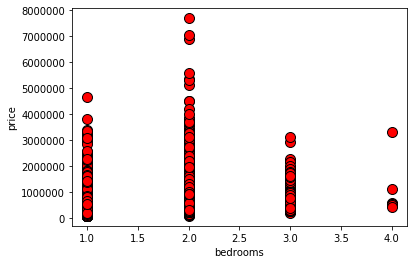

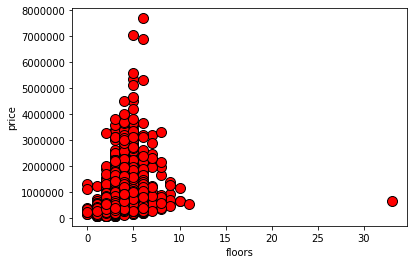

In [81]:

fig = pyplot.figure()  # open a new figure
pyplot.plot(house_data['floors'],house_data_price, 'ro', ms=10, mec='k')
pyplot.ylabel('price')
pyplot.xlabel('bedrooms')

fig = pyplot.figure()  # open a new figure
pyplot.plot(house_data['bedrooms'],house_data_price, 'ro', ms=10, mec='k')
pyplot.ylabel('price')
pyplot.xlabel('floors')

In [0]:
def computeCost(X, y, lamda, theta):
    # num of training examples
    m = normalized_data_price_training.shape[0]    
    J=0
    hyp = np.dot(X,theta)
    J = ((sum((hyp-y)**2))+((sum((theta)**2))*(lamda)))/(2*m)
    
    return J

In [0]:
def computeCostWithout(X, y, theta):
    # num of training examples 
    m = normalized_data_price_training.shape[0] 
    J=0
    hyp = np.dot(X,theta)
    J = (1/(2*m))*(sum((hyp-y)**2))
    
    return J

In [0]:
def gradientDescent(X, y, theta, alpha, lamda, num_iters):
    # Initialize some useful values
    m = normalized_data_price_training.shape[0] # number of training examples
    
    J_history = []
    
    for i in range(num_iters):
        hyp=np.dot(X,theta)
        theta=theta-((alpha/m)*((np.dot(X.T,hyp-y))+(lamda*theta)))   
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, lamda, theta))
    
    return theta, J_history

In [0]:
lamdas= np.arange(0.0001,0.1,0.01)
alpha_1=0.1
alpha_2=0.001
alpha_3=0.000001
thetas_1=np.zeros((normalized_data_training.shape[1]))
thetas_2=np.zeros((normalized_data_training.shape[1]))
thetas_3=np.zeros((normalized_data_training.shape[1]))
num_iters=200

for lamda in lamdas:
    theta=np.zeros(normalized_data_training.shape[1])

    #======================hypothesis 1 ================#
    theta1, J_array_train_1=gradientDescent(normalized_data_training, normalized_data_price_training, theta, alpha_1, lamda, num_iters)
    thetas_1 = numpy.concatenate([thetas_1,theta1], axis=0, out=None)

    #======================hypothesis 2 ================#
    theta2, J_array_train_2=gradientDescent((normalized_data_training)**2, normalized_data_price_training, theta, alpha_2, lamda, num_iters)
    thetas_2 = numpy.concatenate([thetas_2,theta2], axis=0, out=None)

    #======================hypothesis 3 ================#
    theta3, J_array_train_3=gradientDescent((normalized_data_training)**3, normalized_data_price_training, theta, alpha_3, lamda, num_iters)
    thetas_3=numpy.concatenate([thetas_3,theta3], axis=0, out=None)



In [86]:
J_array1 = []
J_array2 = []
J_array3 = []

for i in range(lamdas.size):
    theta_1_cross=thetas_1[i*15:((i+1)*15)] # i am taking 15 thetas from the group of thetas i have gained it from the training calculations
    theta_2_cross=thetas_2[i*15:((i+1)*15)]
    theta_3_cross=thetas_3[i*15:((i+1)*15)]
    #================== hypothesis 1 ================#
    J_array1.append(computeCostWithout(normalized_data_cross_validation, normalized_data_price_cross_validation, theta_1_cross))

    #================== hypothesis 2 ================#
    J_array2.append(computeCostWithout(normalized_data_cross_validation, normalized_data_price_cross_validation, theta_2_cross))

    #================== hypothesis 3 ================#
    J_array3.append(computeCostWithout(normalized_data_cross_validation, normalized_data_price_cross_validation, theta_3_cross))


#================== hypothesis 1 ================#

minimum_Error_Index_1=J_array1.index(min(J_array1))
theta_minimum_Error_1=thetas_1[minimum_Error_Index_1*15:((minimum_Error_Index_1+1)*15)]
lamda_minimum_Error_1=lamdas[minimum_Error_Index_1]

print(minimum_Error_Index_1)
print(J_array1)
print('minError1',min(J_array1))
print('lamda_minError1',lamda_minimum_Error_1)
print('theta_minimun_Error_1',theta_minimun_Error_1)

#================== hypothesis 2 ================#

minimum_Error_Index_2=J_array2.index(min(J_array2))
theta_minimum_Error_2=thetas_2[minimum_Error_Index_2*15:((minimum_Error_Index_2+1)*15)]
lamda_minimum_Error_2=lamdas[minimum_Error_Index_2]

print(minimum_Error_Index_2)
print(J_array2)
print('minError2',min(J_array2))
print('lamda_minError2',lamda_minimum_Error_2)
print('theta_minError2',theta_minimum_Error_2)


#================== hypothesis 3 ================#

minimum_Error_Index_3=J_array3.index(min(J_array3))
theta_minimum_Error_3=thetas_3[minimum_Error_Index_3*15:((minimum_Error_Index_3+1)*15)]
lamda_minimum_Error_3=lamdas[minimum_Error_Index_3]

print(minimum_Error_Index_3)
print(J_array3)
print('minError3',min(J_array3))
print('lamda_minError3',lamda_minimum_Error_3)
print('theta_minError3',theta_minimum_Error_3)



9
[69172417405.82507, 7513223640.174595, 7513222558.1505, 7513221476.200226, 7513220394.323789, 7513219312.521153, 7513218230.792399, 7513217149.137477, 7513216067.556359, 7513214986.049098]
minError1 7513214986.049098
lamda_minError1 0.0901
theta_minimun_Error_1 []
1
[69172417405.82507, 51466304771.056725, 51466305281.59356, 51466305792.130775, 51466306302.66778, 51466306813.2048, 51466307323.74165, 51466307834.27864, 51466308344.81531, 51466308855.35231]
minError2 51466304771.056725
lamda_minError2 0.0101
theta_minError2 [47063.39293134  1061.83412463 24939.92074281 14205.84365751
   292.46751755 41610.97117205 31462.13033808 37456.86782771
 38848.05563635 31113.95076706 32646.47677609 44875.14170184
 13296.32778452 36750.8942373    701.72024918]
1
[69172417405.82507, 68909407752.12617, 68909407752.14539, 68909407752.16512, 68909407752.18442, 68909407752.20387, 68909407752.22314, 68909407752.24258, 68909407752.26198, 68909407752.28134]
minError3 68909407752.12617
lamda_minError3 0.01

In [87]:
hyp1_testError=computeCost(normalized_data_testing, normalized_data_price_testing, lamda_minimum_Error_1, theta_minimum_Error_1)
print('hyp1_testError',hyp1_testError)
hyp2_testError=computeCost(normalized_data_testing**2, normalized_data_price_testing, lamda_minimum_Error_2, theta_minimum_Error_2)
print('hyp2_testError',hyp2_testError)
hyp3_testError=computeCost(normalized_data_testing**3, normalized_data_price_testing, lamda_minimum_Error_3, theta_minimum_Error_3)
print('hyp3_testError',hyp3_testError)


hyp1_testError 8480165295.272381
hyp2_testError 17631828361.415817
hyp3_testError 71148190449.64279


In [0]:

theta=np.zeros(normalized_data_training.shape[1])
num_iters=200
#first hyp
theta1, J_array1=gradientDescent(normalized_data_training, normalized_data_price_training, theta_minimum_Error_1, 0.1, lamda_minimum_Error_1, num_iters)

#second hyp x^2
theta2, J_array2=gradientDescent((normalized_data_training)**2, normalized_data_price_training, theta_minimum_Error_2, 0.001, lamda_minimum_Error_2, num_iters)

#third hyp x^3
theta3, J_array3=gradientDescent((normalized_data_training)**3, normalized_data_price_training, theta_minimum_Error_3, 0.000001, lamda_minimum_Error_3, num_iters)


Text(0, 0.5, 'Cost J1')

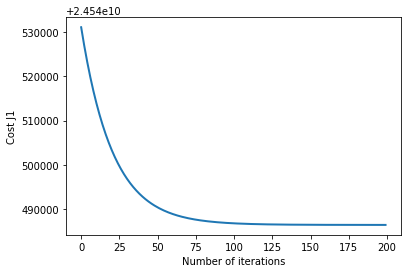

In [89]:
 # error versus the iteration 
pyplot.plot(np.arange(len(J_array1)), J_array1, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J1')

Text(0, 0.5, 'Cost J2')

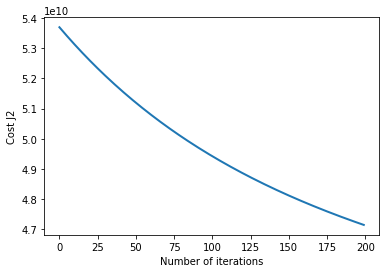

In [90]:
pyplot.plot(np.arange(len(J_array2)), J_array2, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J2')

Text(0, 0.5, 'Cost J3')

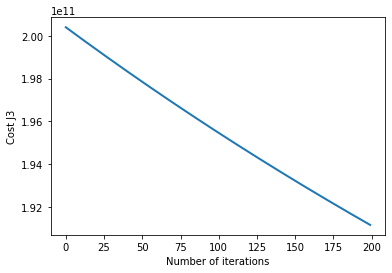

In [91]:

pyplot.plot(np.arange(len(J_array3)), J_array3, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J3')